# IMDB Movie Rating Prediction

## 1. Project Overview

Its always great to know how good the movie would be by looking at the movie rating. Instead of going with the critics, we could rely on the ratings provided by fellow users like us. This is an attempt to predict the movie rating. In this project, Machine Learning and Deep Learning models are used for prediction and evaluation is done with regression metrics.



## 2. Problem Statement

The rating of a new movie will not be available instantly. It will take some time for the users to log their reviews about the new movie. If there is a way to help the users to see the best movie rating based on the various data attributes from other movies, that would be ideal. This would also help viewers to decide up on which movie is worth watching.


## 3. Dataset

   ### movies_metadata.csv: 
    The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. 
    

   ### ratings.csv: 
    The subset of 26.0M ratings from 10,656 users.

 

## 4. Import Required Libraries




In [1]:
import numpy as np #Used for linear algebra calculations
import pandas as pd #Processing data as data frame
import seaborn as sn # For data visualization graphs like heatmap
sn.set(style="white", color_codes = True) #customizes graphs
import matplotlib.pyplot as plt #for visuals
%matplotlib inline
#Graphs are printed in the same window
import sklearn
import warnings #suppress certain warnings from libraries
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics # for the check the error and accuracy of the model
from surprise import Reader, Dataset, SVD, evaluate

## 5. Data Exploration



### Import Data

In [2]:
movie=pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')
#print(movie.columns.values)
labels=movie["imdb_score"]

In [3]:
print(movie.shape)

(5043, 28)


In [4]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Inference:
    #1.The data has 5043 records with 28 columns.
    #2.It has 12 categorical variables
    #3.NULL values has to be removed
    #4.The label/target variable is imdb_score which is a continuous and therefore this is a regression problem.


#### Finding the correlation

In [6]:
movie.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


#### Counting the missing records (NAN's)

In [7]:
movie.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
movie.dropna(inplace=True)

##### Observation:
1. The gross variable has maximum number of missing values which is 884
2. The variable country has minimum number of missing values with count 5

In [9]:
movie.dropna(inplace=True)

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [11]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


#### Data Visualization

##### imbd_score - label 

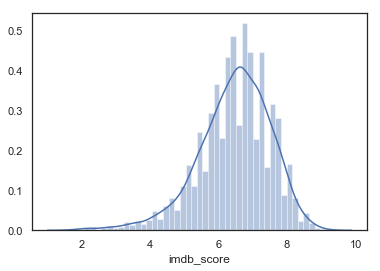

In [12]:
sn.distplot(movie["imdb_score"])

Inference - imdb_score has normal distribution

##### director_facebook_likes - Feature

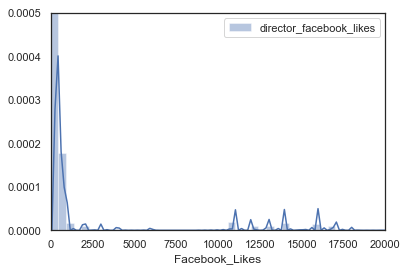

In [13]:
plt.figure()
sn.distplot(movie["director_facebook_likes"], label="director_facebook_likes")
plt.legend()
plt.xlabel("Facebook_Likes")
plt.xlim(0,20000);plt.ylim(0, 0.0005)
plt.show()

Inference - The variable is widely distributed. So it requires feature scaling.

##### actor_facebook_likes - Number of facebook likes of actor1, actor 2, actor3- features

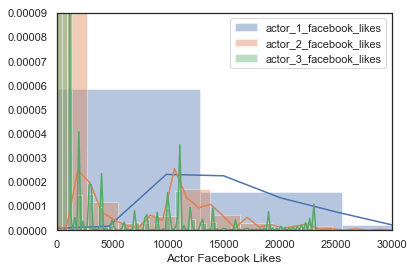

In [14]:
plt.figure()
sn.distplot(movie["actor_1_facebook_likes"], label="actor_1_facebook_likes")
sn.distplot(movie["actor_2_facebook_likes"], label="actor_2_facebook_likes")
sn.distplot(movie["actor_3_facebook_likes"], label="actor_3_facebook_likes")
plt.legend();plt.xlabel("Actor Facebook Likes")
plt.xlim(0,30000)
plt.ylim(0,0.00009)
plt.show()

Inference - The variables are widely distributed. So feature scaling is required.

##### cast_total_facebook_likes, movie_facebook_likes- Features

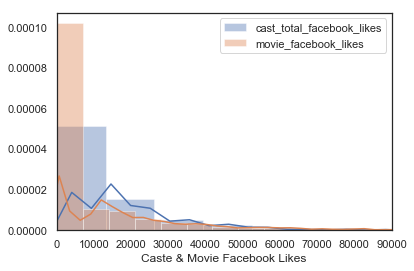

In [15]:
plt.figure()
sn.distplot(movie["cast_total_facebook_likes"], label="cast_total_facebook_likes")
sn.distplot(movie["movie_facebook_likes"], label="movie_facebook_likes")
plt.legend();plt.xlabel("Caste & Movie Facebook Likes")
plt.xlim(0,90000);plt.show()

Inference - They have better statistical distribution curves

##### num_critic_for_reviews, num_voted_users, num_user_for_reviews - feature

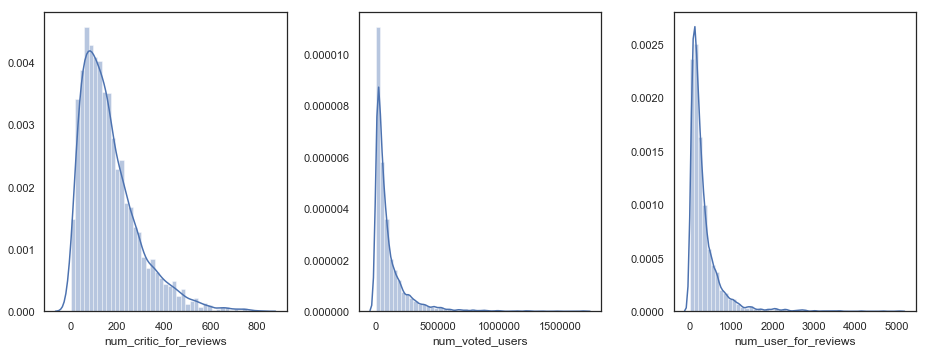

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sn.distplot(movie["num_critic_for_reviews"], label="num_critic_for_reviews")
plt.subplot(1,3,2)
sn.distplot(movie["num_voted_users"], label="num_voted_users")
plt.subplot(1,3,3)
sn.distplot(movie["num_user_for_reviews"], label="num_user_for_reviews")
plt.tight_layout()
plt.show()


Inference - Good statistical distribution. So this can be included.

##### duration, gross, budget, aspect_ratio, facenumber_in_poster: feature variables, numeric

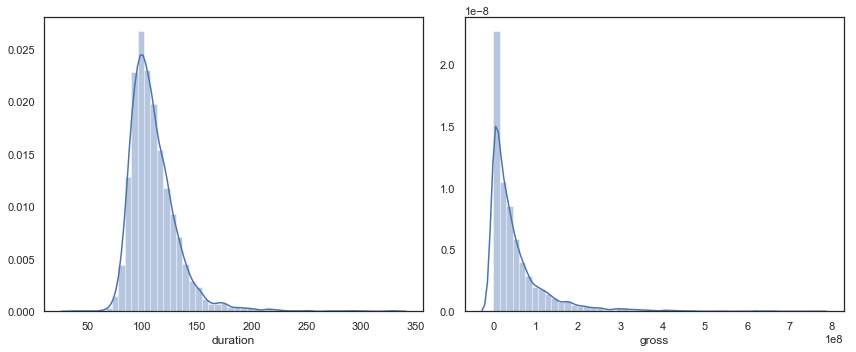

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sn.distplot(movie["duration"], label="duration")
plt.subplot(1,2,2)
sn.distplot(movie["gross"], label="gross")
plt.tight_layout()
plt.show()

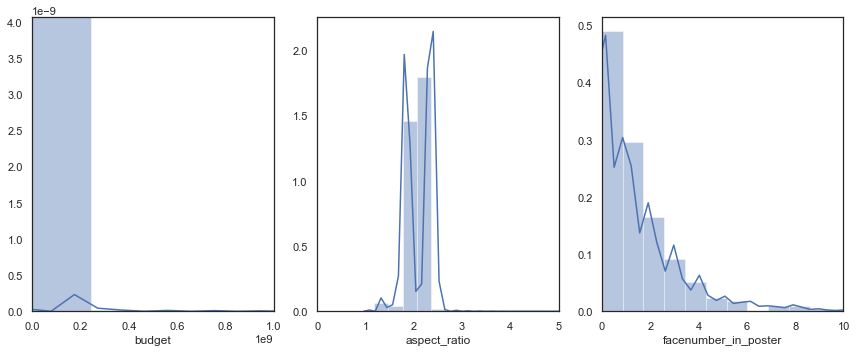

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sn.distplot(movie["budget"], label="budget")
plt.xlim(0,0.1e10)
plt.subplot(1,3,2)
sn.distplot(movie["aspect_ratio"], label="aspect_ratio")
plt.xlim(0,5)
plt.subplot(1,3,3)
sn.distplot(movie["facenumber_in_poster"])
plt.xlim(0,10)
plt.tight_layout()
plt.show()

#### Correlation between given Movie information

Text(0.5,1,'Correlation between given Movie information')

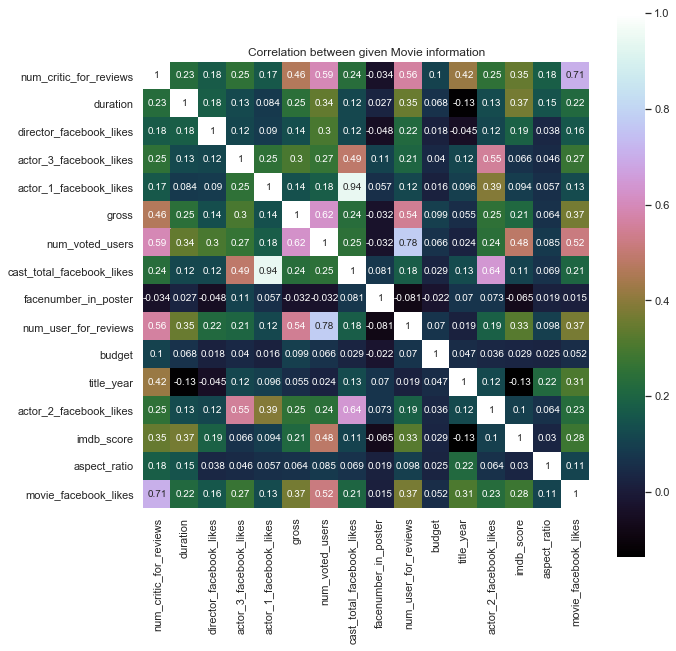

In [20]:
correlation = movie.corr()
plt.figure(figsize = (10,10))
sn.heatmap(correlation, vmax=1, square=True, annot=True,cmap='cubehelix')

plt.title("Correlation between given Movie information")

#### Word Cloud

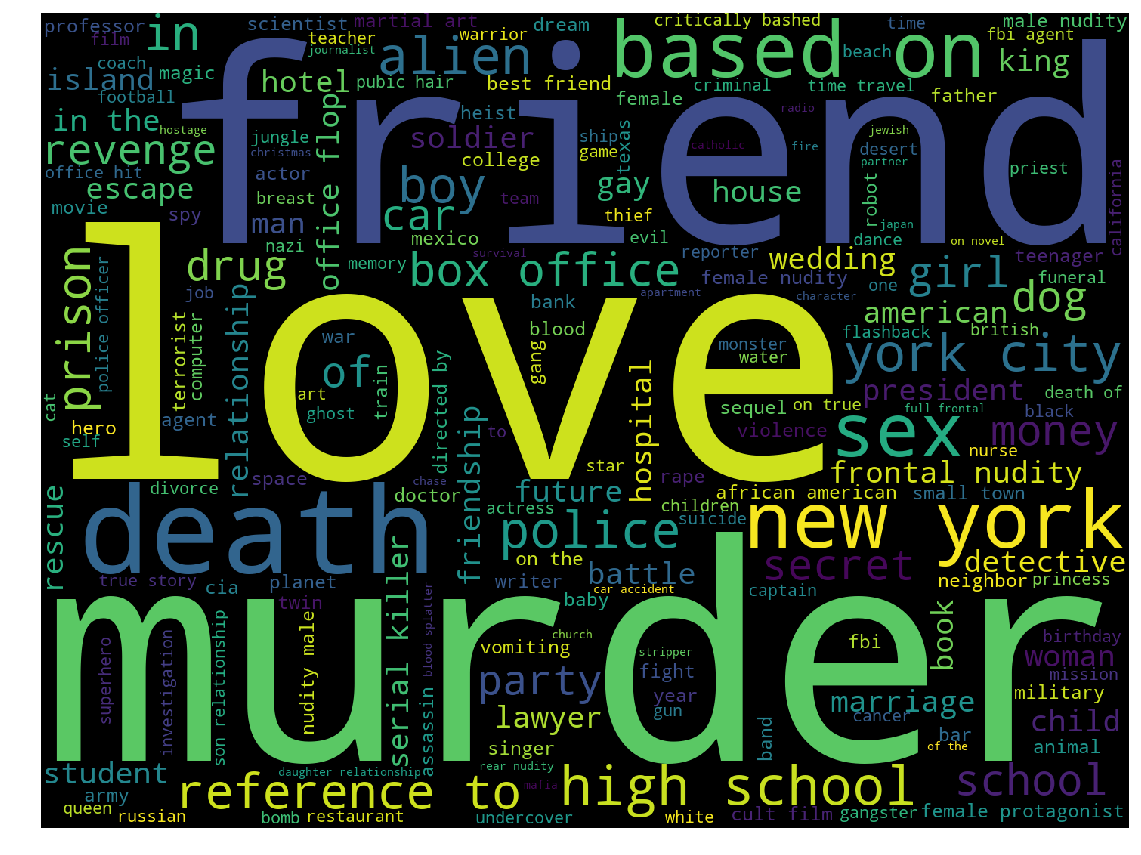

In [21]:
#Insight into plot keywords
plot_keywords = movie.plot_keywords.map(lambda x:str(x).split(","))
empty_array = []
for i in plot_keywords:
    empty_array = np.append(empty_array, i)

from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=['title']).generate(" ".join(empty_array))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 6. Feature Engineering

In [22]:
#Select only numeric columns - Integers and floats as this would simplify the data handling
data = movie
data = data.select_dtypes(include=['int64','float'])

In [23]:
#Define features and target
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes',
       'movie_facebook_likes']
target = ['imdb_score']

## 7. Data Preprocessing

In [24]:
X = movie[features]
y = movie[target]

##### Feature Scaling

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting train data and test data

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1234)


In [27]:
X_train_df = pd.DataFrame(X_train,columns=features)

##### Correlation matrix of features

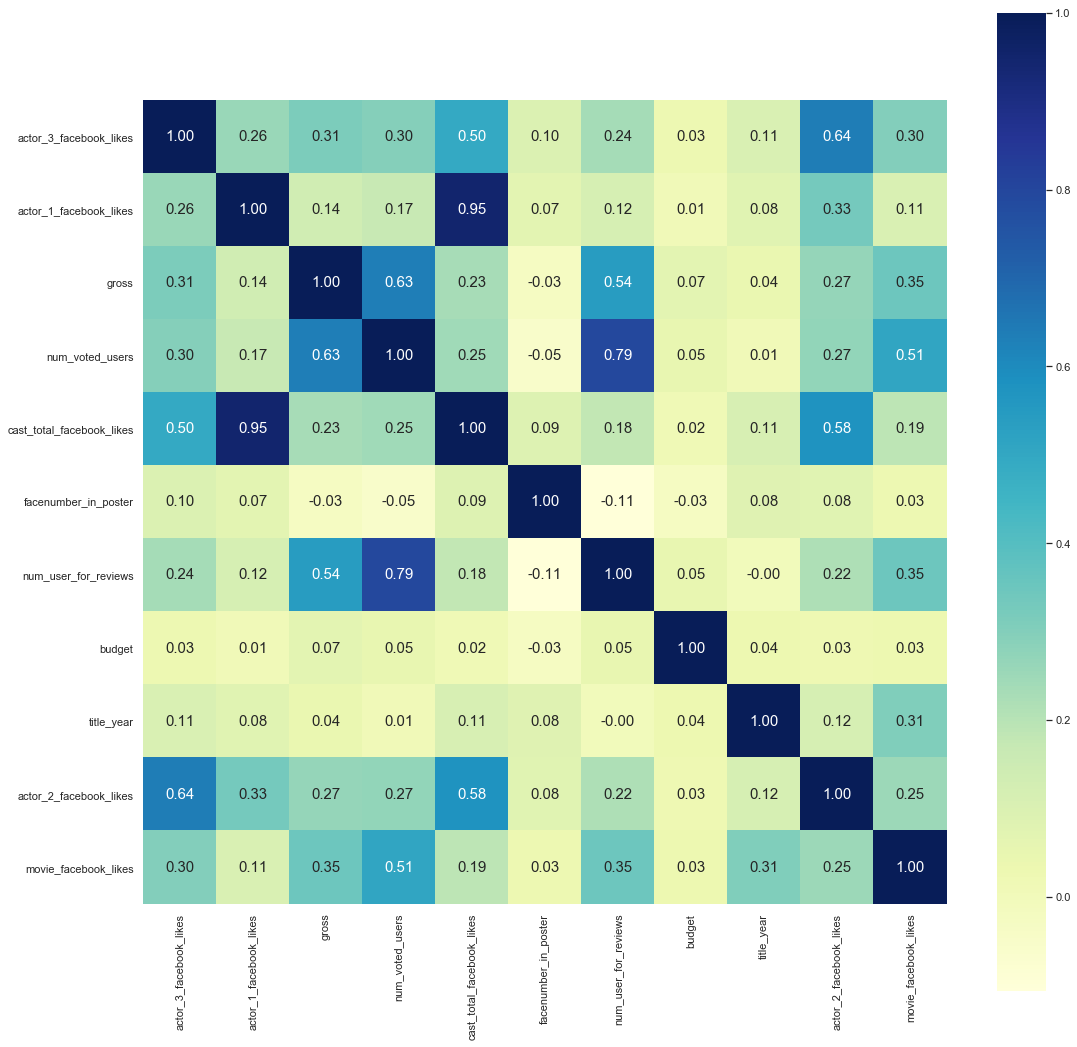

In [28]:

#draw correlation matrix of features
corr = X_train_df.corr()
#draw the heatmap of correlation to identify any features that can be dropped
plt.figure(figsize=(18,18))
sn.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            cmap= 'YlGnBu') 

## 8. Implementation & Model Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error

### 8.1 Linear Regression

In [31]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
mse_linearRegression = mean_squared_error(y_test, y_pred_linear_reg)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse_linearRegression))
rmse_linearRegression =  np.sqrt(mse_linearRegression)
print("Root Mean Squared Error(MSE) of the test set: {:.3f} ".format(rmse_linearRegression))
mae_linearRegression = mean_absolute_error(y_test, y_pred_linear_reg)
print("Mean Absolute Error(MAE) of the test set: {:.3f} ".format(mae_linearRegression))

Mean Squared Error(MSE) of the test set: 0.797 
Root Mean Squared Error(MSE) of the test set: 0.893 
Mean Absolute Error(MAE) of the test set: 0.686 


### 8.2 RandomForest Regressor

In [39]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)
# Predicting results
y_pred_rf = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_randomforest= mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse_randomforest))
rmse_randomforest = np.sqrt(mse_randomforest)
print("Root Mean Squared Error(MSE) of the test set: {:.3f} ".format(rmse_randomforest))
mae_randomForest = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error(MAE) of the test set: {:.3f} ".format(mae_randomForest))


Mean Squared Error(MSE) of the test set: 0.562 
Root Mean Squared Error(MSE) of the test set: 0.750 
Mean Absolute Error(MAE) of the test set: 0.559 


##### Feature importance based on RandomForest Classifier

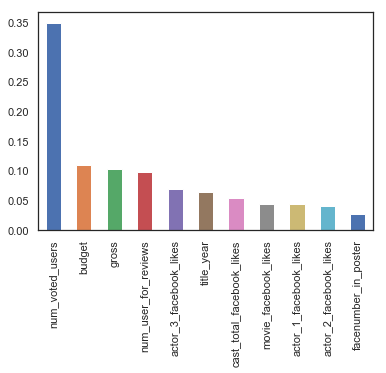

In [40]:
ser = pd.Series(regressor.feature_importances_,index=features)
ser.sort_values(ascending=False,inplace=True)
ser.plot(kind='bar')

### 8.3 Singular Value Decomposition

In [35]:
reader = Reader()
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [36]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [41]:
svd = SVD()
# Model Evaluation with Root Mean Squared Error and Mean Absolute Error
evaluate(svd, data, measures=['RMSE','MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.7960
MAE:  0.6022
------------
Fold 2
RMSE: 0.7961
MAE:  0.6020
------------
Fold 3
RMSE: 0.7959
MAE:  0.6021
------------
Fold 4
RMSE: 0.7963
MAE:  0.6024
------------
Fold 5
RMSE: 0.7969
MAE:  0.6029
------------
------------
Mean RMSE: 0.7962
Mean MAE : 0.6023
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.7959531624959246,
                             0.7961187659073035,
                             0.795949477360045,
                             0.7962806503174252,
                             0.7968560858932968],
                            'mae': [0.602173011848336,
                             0.6020020198420941,
                             0.6020693940284936,
                             0.6023655159516105,
                             0.6028690559180425]})

### 8.4 Implementation with Keras using Tensorflow backend

Implementation of IMDB movie rating with Keras using tensorflow as backend. 

In [112]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
tf.logging.set_verbosity(tf.logging.INFO)


In [113]:
learning_rate = 0.0001
epochs = 3
n_input = 32
n_hidden = 3

In [114]:
print("X_train shape: ", X_train.shape)
print("y_train: shape: ", y_train.shape)
print("X_test: shape:", X_test.shape)
print("y_test: shape: ", y_test.shape)

X_train shape:  (2441, 11)
y_train: shape:  (2441, 1)
X_test: shape: (1315, 11)
y_test: shape:  (1315, 1)


##### Adding sequential dense fully connected layers

In [124]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(rate = 0.5))
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mse',metrics=['mse'],optimizer='adam')

In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 64)                768       
_________________________________________________________________
batch_normalization_22 (Batc (None, 64)                256       
_________________________________________________________________
dense_77 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_78 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 17        
Total params: 3,649
Trainable params: 3,521
Non-trainable params: 128
_________________________________________________________________


In [127]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=40, verbose=1)

Epoch 1/200
2441/2441 [==============================] - 0s 24us/step - loss: 0.5329 - mean_squared_error: 0.5329
Epoch 2/200
2441/2441 [==============================] - 0s 24us/step - loss: 0.5021 - mean_squared_error: 0.5021
Epoch 3/200
2441/2441 [==============================] - 0s 22us/step - loss: 0.5190 - mean_squared_error: 0.5190
Epoch 4/200
2441/2441 [==============================] - ETA: 0s - loss: 0.5357 - mean_squared_error: 0.53 - 0s 23us/step - loss: 0.5331 - mean_squared_error: 0.5331
Epoch 5/200
2441/2441 [==============================] - 0s 23us/step - loss: 0.5729 - mean_squared_error: 0.5729
Epoch 6/200
2441/2441 [==============================] - 0s 23us/step - loss: 0.5157 - mean_squared_error: 0.5157
Epoch 7/200
2441/2441 [==============================] - 0s 23us/step - loss: 0.5329 - mean_squared_error: 0.5329
Epoch 8/200
2441/2441 [==============================] - 0s 24us/step - loss: 0.5126 - mean_squared_error: 0.5126
Epoch 9/200
2441/2441 [=============

2441/2441 [==============================] - 0s 21us/step - loss: 0.4828 - mean_squared_error: 0.4828
Epoch 72/200
2441/2441 [==============================] - 0s 22us/step - loss: 0.4819 - mean_squared_error: 0.4819
Epoch 73/200
2441/2441 [==============================] - 0s 22us/step - loss: 0.4688 - mean_squared_error: 0.4688
Epoch 74/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4870 - mean_squared_error: 0.4870
Epoch 75/200
2441/2441 [==============================] - 0s 20us/step - loss: 0.4962 - mean_squared_error: 0.4962
Epoch 76/200
2441/2441 [==============================] - 0s 20us/step - loss: 0.4756 - mean_squared_error: 0.4756
Epoch 77/200
2441/2441 [==============================] - 0s 20us/step - loss: 0.4936 - mean_squared_error: 0.4936
Epoch 78/200
2441/2441 [==============================] - 0s 20us/step - loss: 0.4952 - mean_squared_error: 0.4952
Epoch 79/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4839 - mean_

Epoch 142/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4442 - mean_squared_error: 0.4442
Epoch 143/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4634 - mean_squared_error: 0.4634
Epoch 144/200
2441/2441 [==============================] - 0s 22us/step - loss: 0.4480 - mean_squared_error: 0.4480
Epoch 145/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4554 - mean_squared_error: 0.4554
Epoch 146/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4740 - mean_squared_error: 0.4740
Epoch 147/200
2441/2441 [==============================] - 0s 22us/step - loss: 0.4635 - mean_squared_error: 0.4635
Epoch 148/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4551 - mean_squared_error: 0.4551
Epoch 149/200
2441/2441 [==============================] - 0s 21us/step - loss: 0.4682 - mean_squared_error: 0.4682
Epoch 150/200
2441/2441 [==============================] - 0s 20us/step 

##### Evaluation on the test set

In [128]:
scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=1)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(scores[1]))

1315/1315 [==============================] - 0s 193us/step
Mean Squared Error(MSE) of the test set: 0.772 


In [130]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.17%


#Better mean squared error and better accuracy